## 01. Test fourier transform quick

c:\Users\ewa.miazga\miniconda3\envs\open3d_env\lib\site-packages\torchvision\datasets\mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


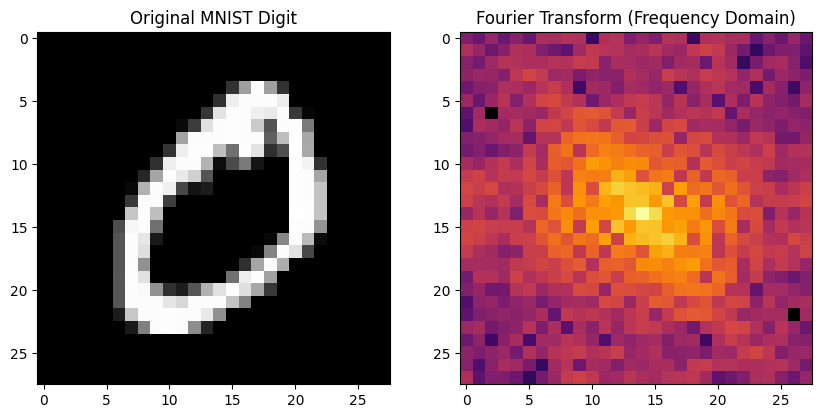

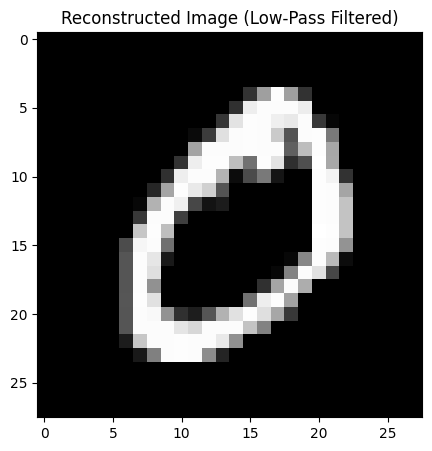

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, fftshift, ifft2
from torchvision import datasets, transforms

# Load an MNIST digit
transform = transforms.Compose([transforms.ToTensor()])
mnist = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

## Select a digit (change index to visualize different ones)
# choose index of the image on which there is a digit 0
index = mnist.train_labels.eq(0).nonzero().squeeze()[0]
#index = 0
image = mnist.data[index].numpy()

# Apply 2D Fourier Transform
fft_image = fft2(image)  # Compute FFT
fft_image_shifted = fftshift(fft_image)  # Shift low frequencies to center
magnitude_spectrum = np.log(np.abs(fft_image_shifted) + 1)  # Log scale for better visualization

# Display the original and frequency domain images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original MNIST Digit")

axes[1].imshow(magnitude_spectrum, cmap="inferno")
axes[1].set_title("Fourier Transform (Frequency Domain)")

plt.show()

# Low-pass filtering (keeping only low frequencies)
def low_pass_filter(fft_img, radius=20):
    rows, cols = fft_img.shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros_like(fft_img)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2) < radius:
                mask[i, j] = 1
    return fft_img * mask

# Apply Low-Pass Filter
filtered_fft = low_pass_filter(fft_image_shifted, radius=20)
filtered_image = np.abs(ifft2(np.fft.ifftshift(filtered_fft)))

# Display filtered image
plt.figure(figsize=(5, 5))
plt.imshow(filtered_image, cmap="gray")
plt.title("Reconstructed Image (Low-Pass Filtered)")
plt.show()


## 02. Compare how similar are the transforms of the same digits
for 10 examples from mnist dataset

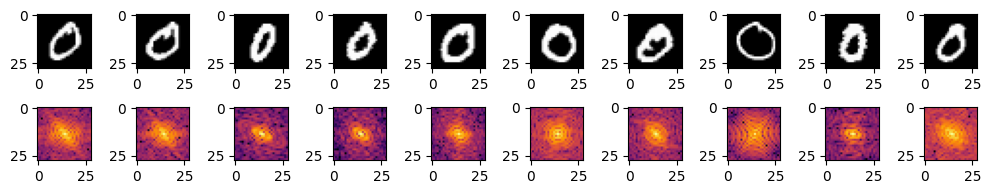

In [11]:
# Function that shows 10 images of the same digit and their corresponding Fourier Transforms
def images_and_frequencies(digit, num_images=10):
    # Get indices of the digit
    indices = mnist.train_labels.eq(digit).nonzero().squeeze()
    indices = indices[:num_images]

    # Display images and their Fourier Transforms
    fig, axes = plt.subplots(2, num_images, figsize=(10, 2))
    for i, idx in enumerate(indices):
        image = mnist.data[idx].numpy()
        fft_image = fft2(image)
        fft_image_shifted = fftshift(fft_image)
        magnitude_spectrum = np.log(np.abs(fft_image_shifted) + 1)

        axes[0, i].imshow(image, cmap="gray")
        #axes[0, i].set_title("Digit: {}".format(digit))

        axes[1, i].imshow(magnitude_spectrum, cmap="inferno")
        #axes[1, i].set_title("Fourier Transform")
        
    plt.tight_layout()

# Display images
images_and_frequencies(0)


c:\Users\ewa.miazga\miniconda3\envs\open3d_env\lib\site-packages\torchvision\datasets\mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


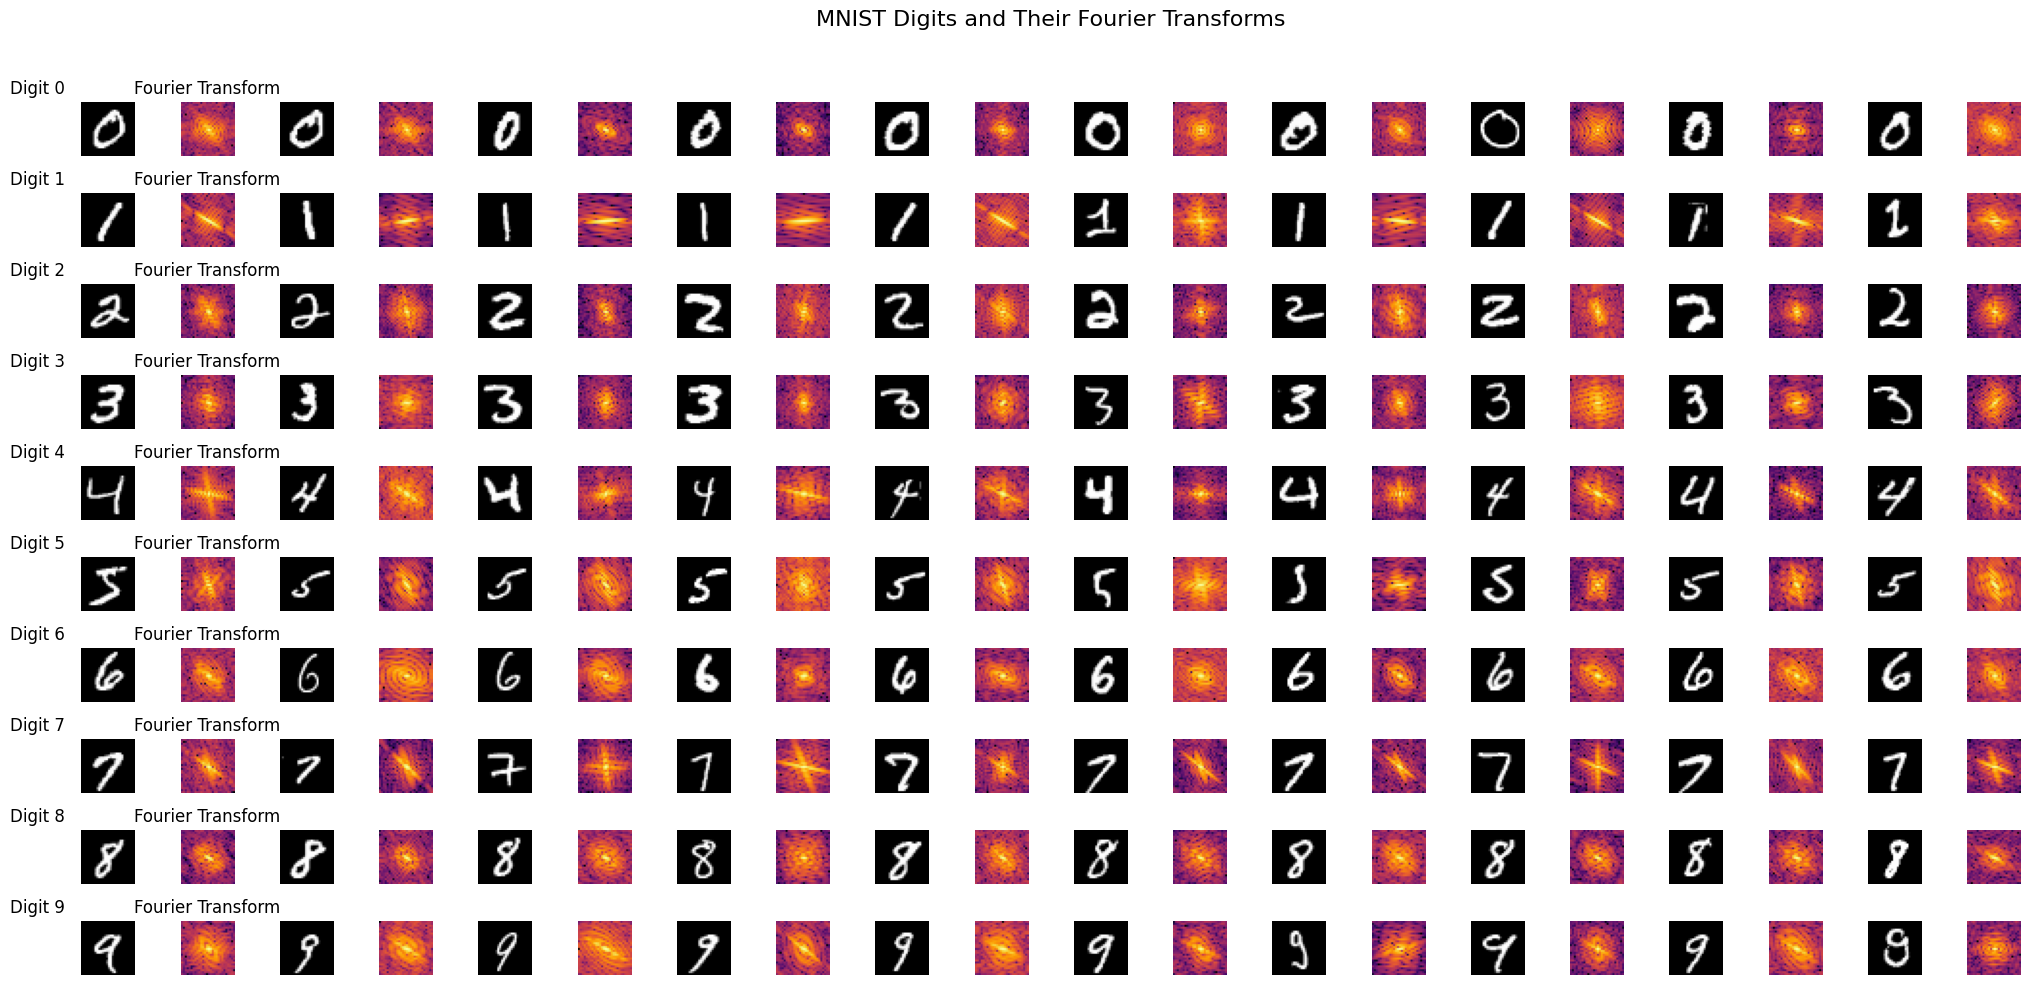

In [30]:
# Function that shows 10 images of all digits and their corresponding Fourier Transforms
def all_images_and_frequencies(mnist):
    # Display images and their Fourier Transforms
    fig, axes = plt.subplots(10, 20, figsize=(20, 10))
    fig.suptitle("MNIST Digits and Their Fourier Transforms", fontsize=16)
    
    images, frequencies = [], []
    for digit in range(10):
        indices = mnist.train_labels.eq(digit).nonzero().squeeze()
        indices = indices[:10]  # Take up to 10 images for each digit
        
        for j, idx in enumerate(indices):
            image = mnist.data[idx].numpy()
            fft_image = fft2(image)
            fft_image_shifted = fftshift(fft_image)
            magnitude_spectrum = np.log(np.abs(fft_image_shifted) + 1)

            # Display the original image
            axes[digit, j * 2].imshow(image, cmap="gray")
            axes[digit, j * 2].axis('off')
            if j == 0:
                axes[digit, j * 2].set_title(f"Digit {digit}                           ", fontsize=12)

            # Display the magnitude spectrum of the Fourier Transform
            axes[digit, j * 2 + 1].imshow(magnitude_spectrum, cmap="inferno")
            axes[digit, j * 2 + 1].axis('off')
            if j == 0:
                axes[digit, j * 2 + 1].set_title("Fourier Transform", fontsize=12)

            images.append(image)
            frequencies.append(magnitude_spectrum)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    return images, frequencies

# Example usage
# Assuming `mnist` is a dataset object with `train_labels` and `data` attributes
images, frequencies = all_images_and_frequencies(mnist)

## 03. Average the Fourier maps of the same digit images

c:\Users\ewa.miazga\miniconda3\envs\open3d_env\lib\site-packages\torchvision\datasets\mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


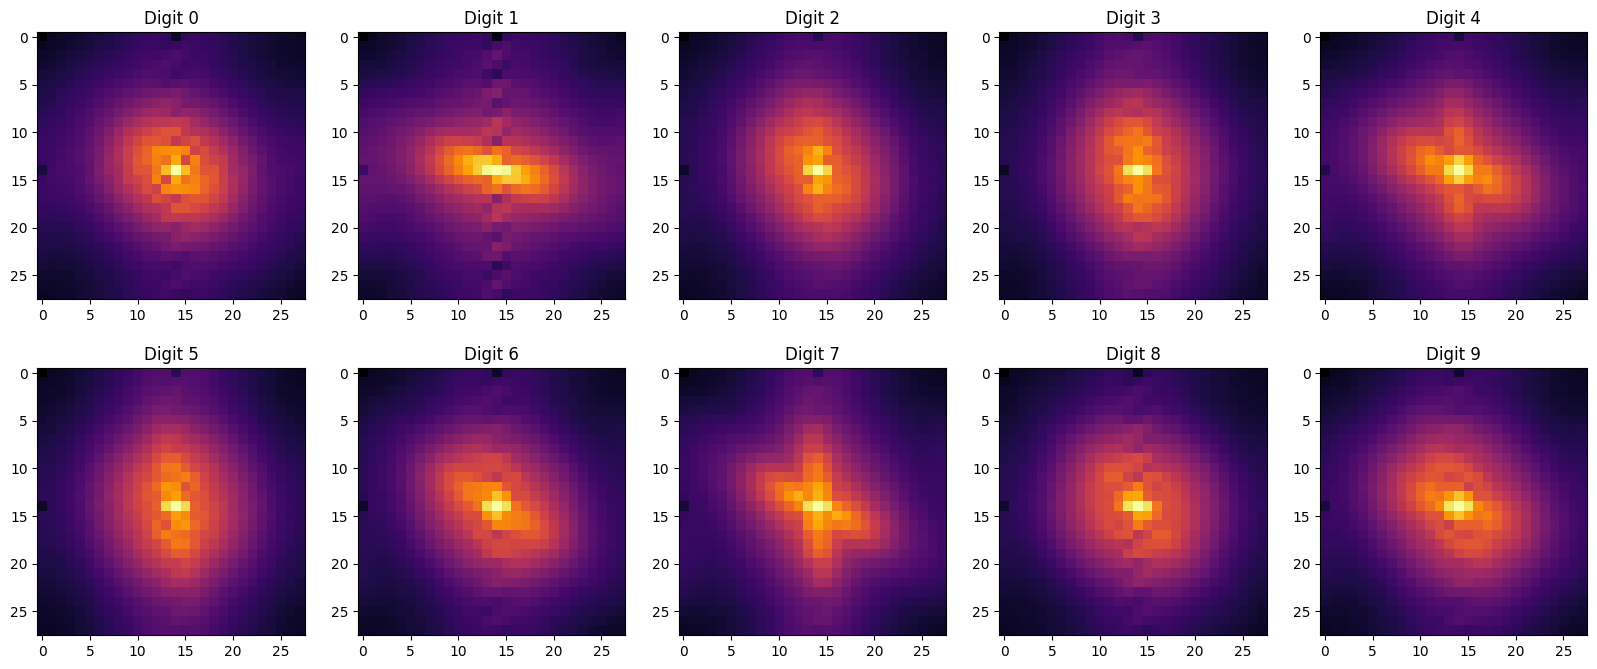

In [26]:
# Calaculate average of all magnitue spectrums of the same digits for all classes in mnist
def average_magnitudes(mnist):
    avg_magnitudes = np.zeros((10, 28, 28))
    for digit in range(10):
        indices = mnist.train_labels.eq(digit).nonzero().squeeze()
        for idx in indices:
            image = mnist.data[idx].numpy()
            fft_image = fft2(image)
            fft_image_shifted = fftshift(fft_image)
            magnitude_spectrum = np.log(np.abs(fft_image_shifted) + 1)
            avg_magnitudes[digit] += magnitude_spectrum
        avg_magnitudes[digit] /= len(indices)
    return avg_magnitudes

# Vidsalize average magnitudes
avg_magnitudes = average_magnitudes(mnist)
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for digit in range(10):
    axes[digit // 5, digit % 5].imshow(avg_magnitudes[digit], cmap="inferno")
    axes[digit // 5, digit % 5].set_title(f"Digit {digit}")
    

## 04. Calculate the correlation
Lets see how the Fourier signals of image of the same image are correlated

(784,)
(784,)
(100, 784)
(10, 784)


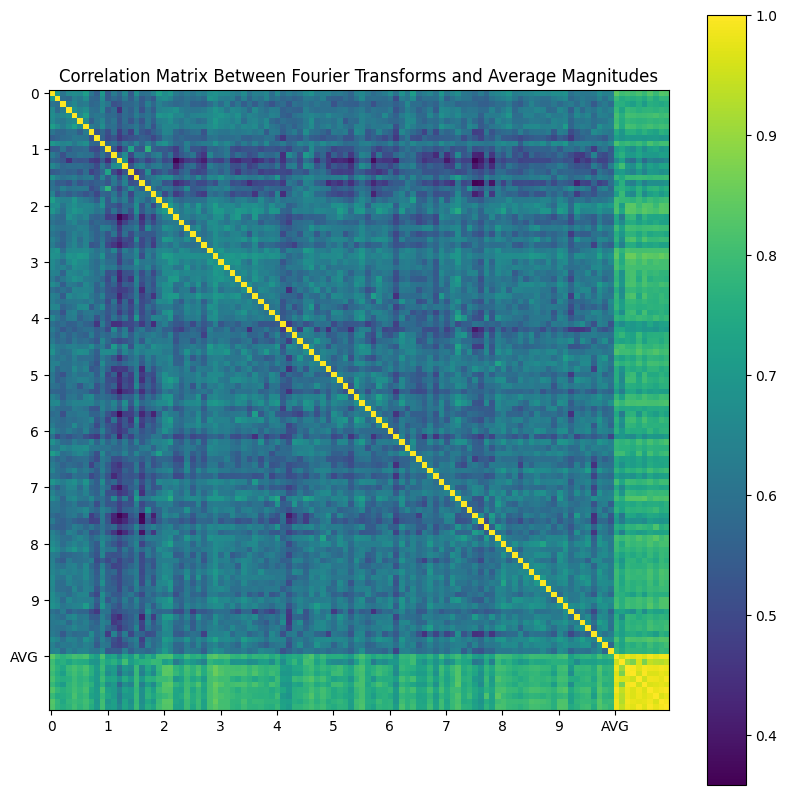

In [47]:
# Function to compute the correlation matrix between Fourier transforms of the images and average magnitudes
def correlation_matrix(frequencies, avg_magnitudes):
    num_classes = 10
    num_pixels = 28 * 28

    # Flatten the average magnitudes
    avg_magnitudes_flattened = avg_magnitudes.reshape(num_classes, num_pixels)

    # Combine frequencies and average magnitudes
    combined_data = np.vstack((frequencies, avg_magnitudes_flattened))

    # Compute correlation matrix
    corr_matrix = np.corrcoef(combined_data)
    return corr_matrix


frequencies = np.array(frequencies).reshape(100, -1)
avg_magnitudes = np.array(avg_magnitudes).reshape(10, -1)

print(frequencies[0].shape)
print(avg_magnitudes[0].shape)
print(frequencies.shape)
print(avg_magnitudes.shape)
# Compute correlation matrix
corr_matrix = correlation_matrix(frequencies, avg_magnitudes)

# Display correlation matrix and meaningful interpretation
plt.figure(figsize=(10, 10))
plt.imshow(corr_matrix)#, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar()
plt.title("Correlation Matrix Between Fourier Transforms and Average Magnitudes")
# every ten y and x axis is the same digit
plt.xticks(np.arange(0, 110, 10), labels=list(map(str, range(10))) + ["AVG"])
plt.yticks(np.arange(0, 110, 10), labels=list(map(str, range(10))) + ["AVG"])

plt.show()



## 05. PCA - showing 5 most important componenents of the image

(28, 28)


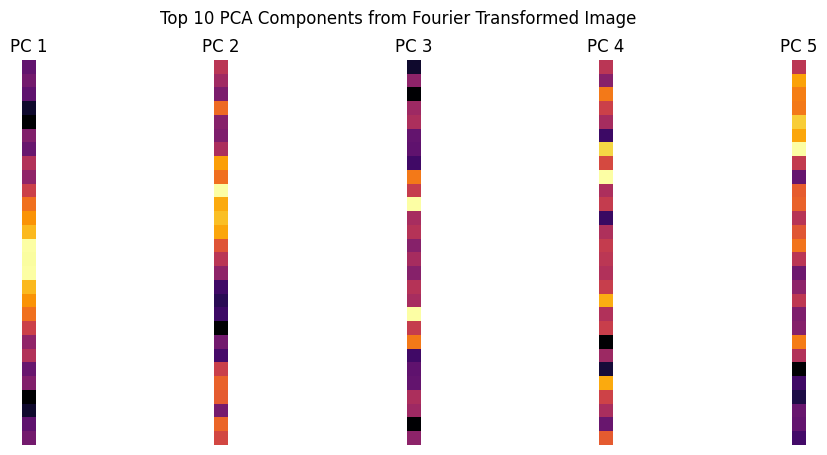

In [61]:
from sklearn.decomposition import PCA


magnitude_spectrum = np.abs(frequencies[0].reshape(28,28))  # Get magnitude (ignore phase)

print(magnitude_spectrum.shape)
# Flatten the frequency image for PCA
flat_fft = magnitude_spectrum

# Apply PCA (keep 10 principal components)
pca = PCA(n_components=5)
pca_transformed = pca.fit_transform(flat_fft)  # Apply PCA
principal_components = pca.components_  # Get principal components

# Reshape components back to 28x28 for visualization
pca_images = [pc for pc in principal_components]

# Visualize the top PCA components
fig, axes = plt.subplots(1, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(principal_components[i].reshape(28, -1), cmap="inferno")
    ax.set_title(f"PC {i+1}")
    ax.axis("off")

plt.suptitle("Top 10 PCA Components from Fourier Transformed Image")
plt.show()

In [73]:
# Calculate the most important PCA components for class of images with chosen label

def pca_components_for_digit(digit, frequencies, num_components=5):
    # Get indices of the digit
    indices = digit * 10 + np.arange(10)
    indices = indices[:10]
    avg = avg_magnitudes[digit].reshape(28, 28)

    # Get magnitude spectrums for the digit
    magnitude_spectrums = [np.abs(frequencies[idx].reshape(28, 28)) for idx in indices] + [avg]
    # Apply PCA on the magnitude spectrums
    pca_components = []
    for magnitude_spectrum in magnitude_spectrums:
        flat_fft = magnitude_spectrum
        pca = PCA(n_components=num_components)
        pca_transformed = pca.fit_transform(flat_fft)
        principal_components = pca.components_
        pca_components.append(principal_components)

    return pca_components

pca_components_0 = pca_components_for_digit(0, frequencies, num_components=5)

print(pca_components_0[0].shape)
print(len(pca_components_0))

(5, 28)
11


## 06. Show the correlation between first 5 most important PCA components

We consider only images of the same digit, so corresponding to the same clas. 
What would be expected is to see some correlation between components, it would mean that they are able to represent the class correctly.


We have list of (11, 5, 28)
- 11 fourier transfored mnist images (10 transformed images and 11th that is a AVG of all transforms maps of the same digit class)
- 5 PCA components per image
- component is a one dimensional list of 28

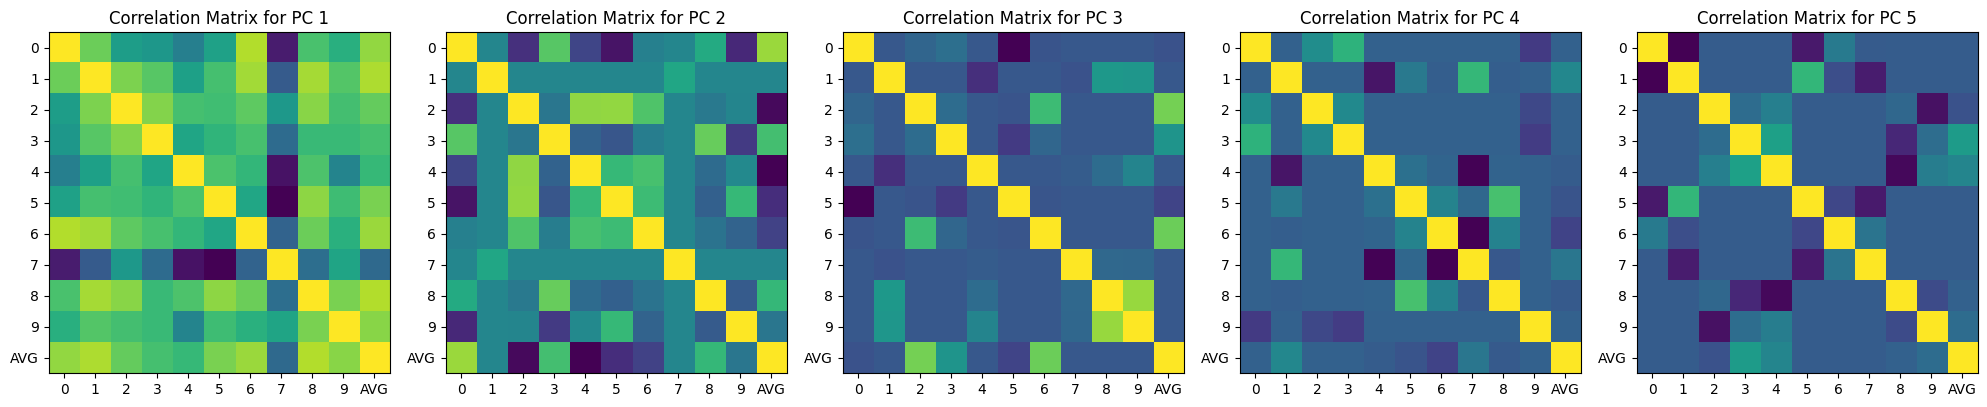

In [83]:
# Calcluate correlation mateix between PCA components for all freq of chosen digit class

def pca_correlation_matrix(pca_components):
    num_components = pca_components[0].shape[0]
    num_images = len(pca_components)

    pca_components_flattened = np.array(pca_components).reshape(num_images, num_components, -1)

    # Create a separate correlation matrix for each component
    correlation_matrices = []
    for i in range(num_components):
        component_data = pca_components_flattened[:, i, :]
        corr_matrix = np.corrcoef(component_data)
        correlation_matrices.append(corr_matrix)

    return correlation_matrices

corr_matrices_pca = pca_correlation_matrix(pca_components_0)

# Display correlation matrix and meaningful interpretation
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(corr_matrices_pca[i])#, cmap="coolwarm", vmin=-1, vmax=1)
    ax.set_title(f"Correlation Matrix for PC {i+1}")
    ax.set_xticks(np.arange(0, 11, 1))
    ax.set_yticks(np.arange(0, 11, 1))
    ax.set_xticklabels(list(range(10)) + ["AVG"])
    ax.set_yticklabels(list(range(10)) + ["AVG"])
    ax.grid(False)
plt.tight_layout()
plt.show()



## 07. Report

- Correlation between Fourier transformed samples seem not to be significant - so it is not enough to use it as a representation. However looking at the images themselves we can tell that they actually represents some disinguishable shapes.
- **Correlation between PC 1 & 2 seems to be vissible**. It has been calculated just for one class = digit class 0.

